__Scipy and MATLAB versions of FAST FOURIER TRANSFFORM(FFT)__

 __Brian KYANJO__

__BOSIE STATE UNIVERSITY__

_March 5, 2021_

### Fast Fourier Transform (FFT)

FFT is a fast way of computing the discrete Fourier transform (DFT) of a sequence, or its inverse (IDFT). 

As discused in class, Fourier analysis is a method used to express a function as a sum of periodic components, and recovering back the signal from those components. 

It becomes interesting when both the function and their corresponding Fourier transform are replaced with discrete counterparts, which gives as DFT.

__History:__ The FFT was known to Gauss (1805) and was embrassed by Cooley and Tukey.

### In depth
The FFT y[k] of length N of the length-N sequence x[n] (its inverse transform ifft) is defined as
\begin{equation}
y[k] = \sum_{n=0}^{N-1} e^{-2\pi j \frac{kn}{N}} x[n]
\end{equation}
 
 where the inverse transform x[n] is given by
 
\begin{equation}
x[n] = \frac{1}{N} \sum_{k=0}^{N-1} e^{-2\pi j \frac{kn}{N}} y[k]
\end{equation}


#### Libraries Used
- fft: computes the 1D DFT. It inputs an array and returns complex numpy array
- ifft: computes the 1D inverse DFT. It inputs an array and returns complex numpy array
- fftshift : Allows swapping the lower and upper halves of a vector.
- fftfreq : returns fft sample frequency points.
- next_fast_len: Size to pad input to for most efficient transforms

In [1]:
#importing libraries
%matplotlib notebook
%pylab
from scipy.fft import fft, ifft, fftshift, fftfreq

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


In [2]:
# Example: Take the fft of f(x) = sin(x) evaluated at 16 points.
#domain
a = 0; b = 2*pi
#points
N = 16

#function f(x)
def f(x):
    return sin(x)

def fdct(f,a,b,N):
    #input array x
    x = linspace(a,b,N+1,endpoint=False,)
    
    #compute the fft
    yfft = fft(f(x))
    
    #compute the ifft
    yifft = ifft(yfft)
    
    return x,f(x),yfft,yifft

<IPython.core.display.Javascript object>


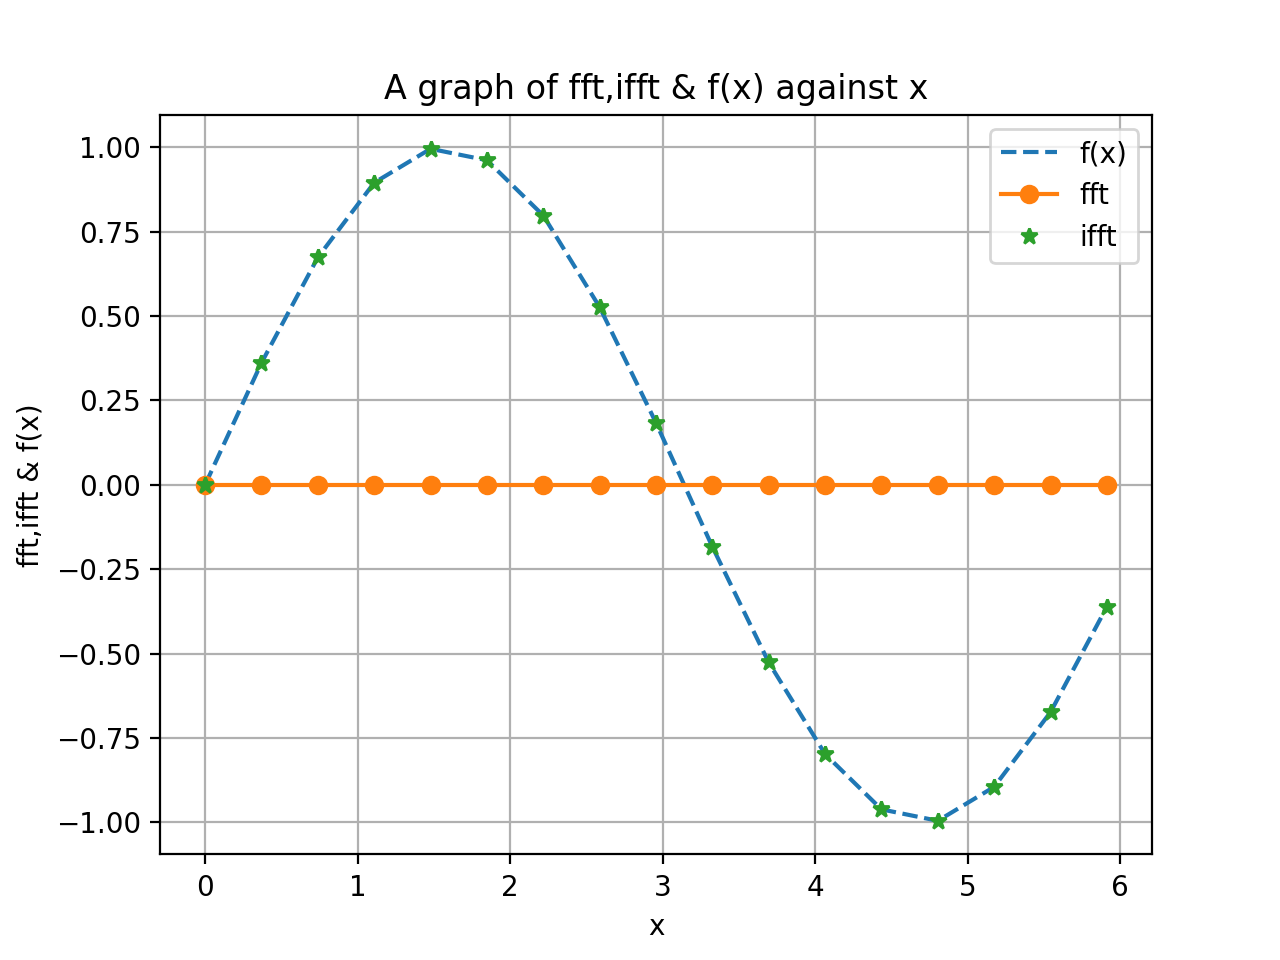

/Users/mathadmin/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/mathadmin/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [3]:
x,f,yfft,yifft = fdct(f,a,b,N)
#Plotting
figure(1)
plot(x,f,'--',label='f(x)')
plot(x,yfft,'-o',label='fft')
plot(x,yifft,'*',label='ifft')
xlabel('x'); ylabel('fft,ifft & f(x)')
title('A graph of fft,ifft & f(x) against x')
legend()
grid()
show()

<IPython.core.display.Javascript object>


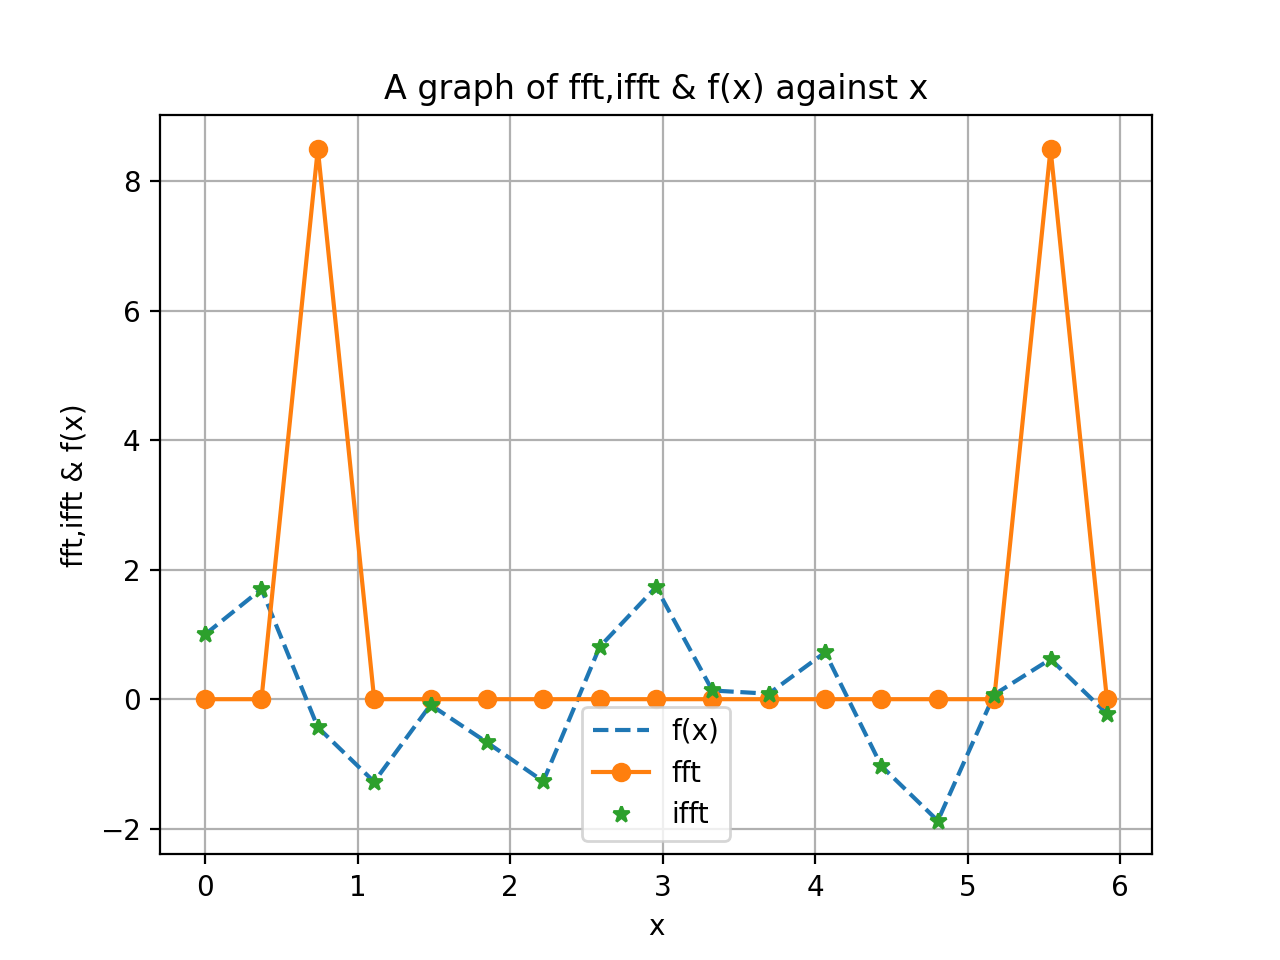

/Users/mathadmin/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/mathadmin/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [5]:
#More complicated example
#function f(x)
def f(x):
    return cos(2*x) + sin(5*x)
x,f,yfft,yifft = fdct(f,a,b,N)
#Plotting
figure(2)
plot(x,f,'--',label='f(x)')
plot(x,yfft,'-o',label='fft')
plot(x,yifft,'*',label='ifft')
xlabel('x'); ylabel('fft,ifft & f(x)')
title('A graph of fft,ifft & f(x) against x')
legend()
grid()
show()


In [7]:
#use fftshift
x = arange(N)
print('x = ',x,'\n')

xshift=fftshift(x)
print('xshift = ',xshift)

x =  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15] 

xshift =  [ 8  9 10 11 12 13 14 15  0  1  2  3  4  5  6  7]


In [8]:
#use of fftreq
freqpoints = fftfreq(N)
print('freqpoints = ',freqpoints)

freqpoints =  [ 0.      0.0625  0.125   0.1875  0.25    0.3125  0.375   0.4375 -0.5
 -0.4375 -0.375  -0.3125 -0.25   -0.1875 -0.125  -0.0625]


In [9]:
#Usage of fftfreq and fftshift
#domain
a = -2; b =  2

def fdct_shift_req(a,b,f,N):
    #input array x
    x = linspace(a,b,N)
    
    #fft of f
    yf = fft(f(x))
    
    #sampled frequency points
    
    xf = fftfreq(N)
    
    #swap lower and upper halves of xf and yf
    xf = fftshift(xf)
    yplot =fftshift(yf)
    return xf,yplot

<IPython.core.display.Javascript object>


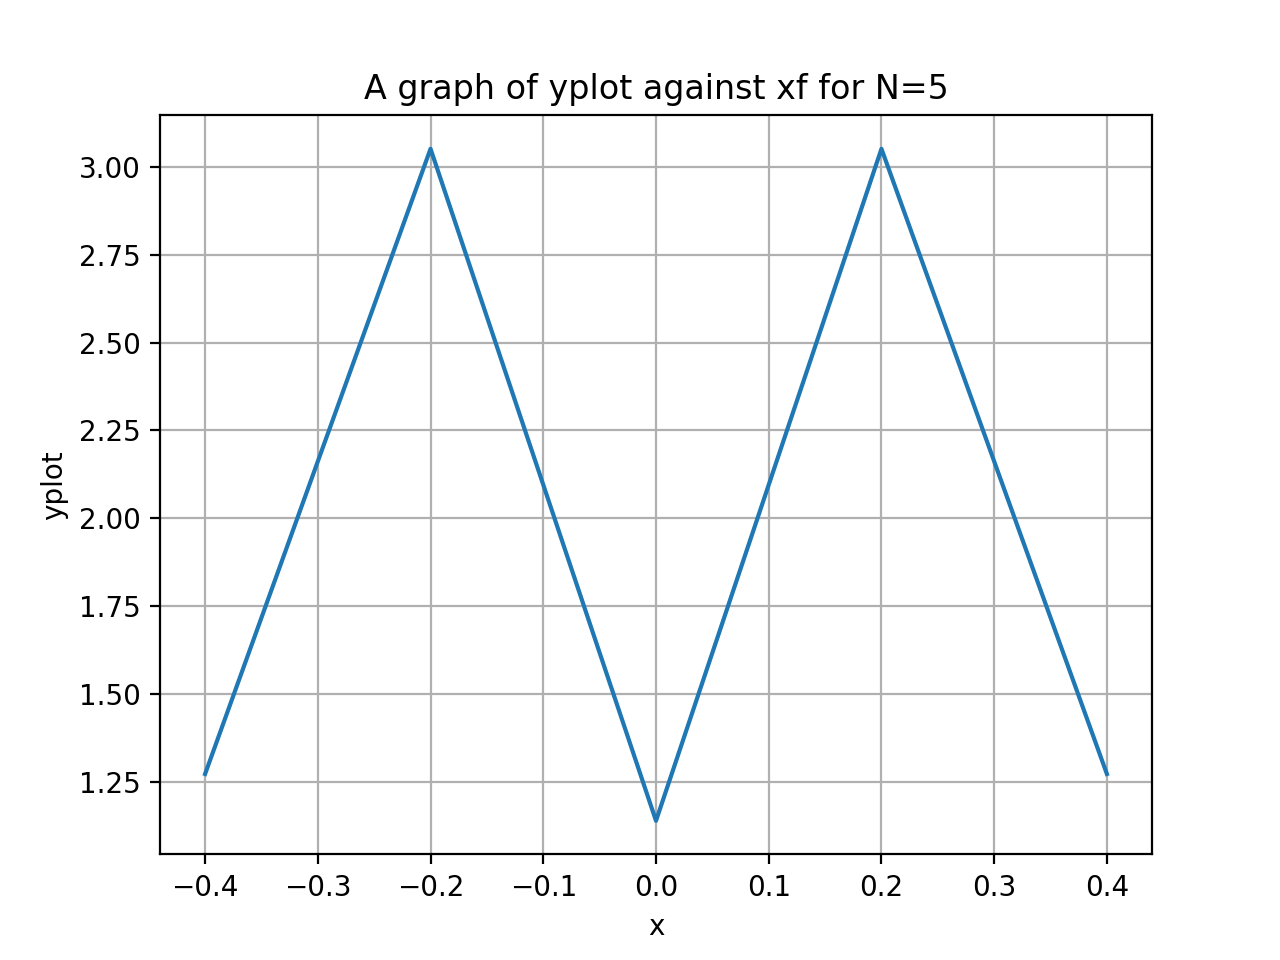

<IPython.core.display.Javascript object>


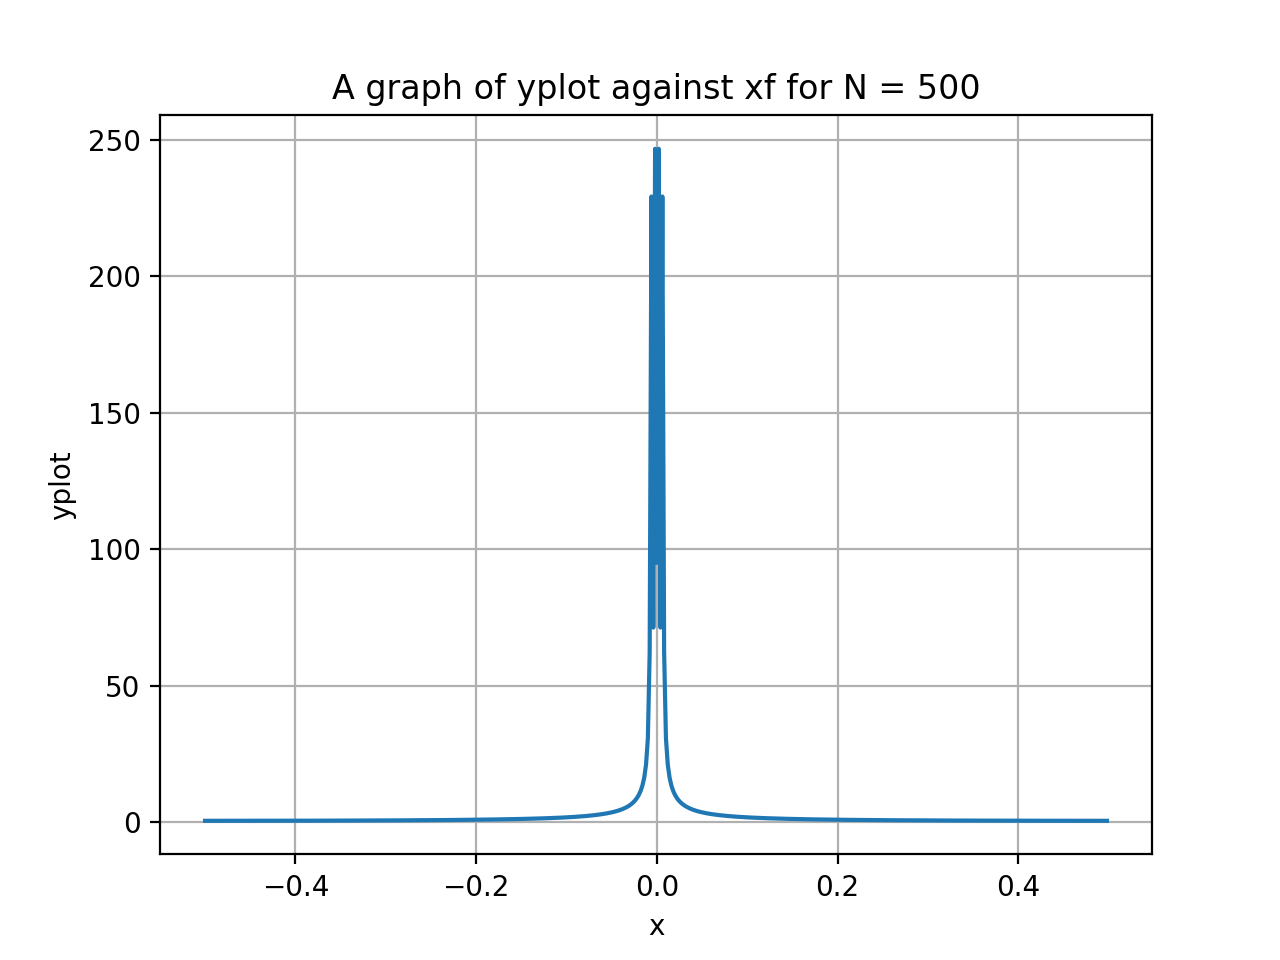

In [10]:
def f(x):
    return cos(2*x) + sin(5*x)

xf,yplot = fdct_shift_req(a,b,f,N=5)

xf1,yplot1 = fdct_shift_req(a,b,f,N=500)

figure(3)
plot(xf,abs(yplot))
xlabel('x'); ylabel('yplot')
title('A graph of yplot against xf for N=5')
grid()

figure(4)
plot(xf1,abs(yplot1))
xlabel('x'); ylabel('yplot')
title('A graph of yplot against xf for N = 500')
grid()
show()

<IPython.core.display.Javascript object>


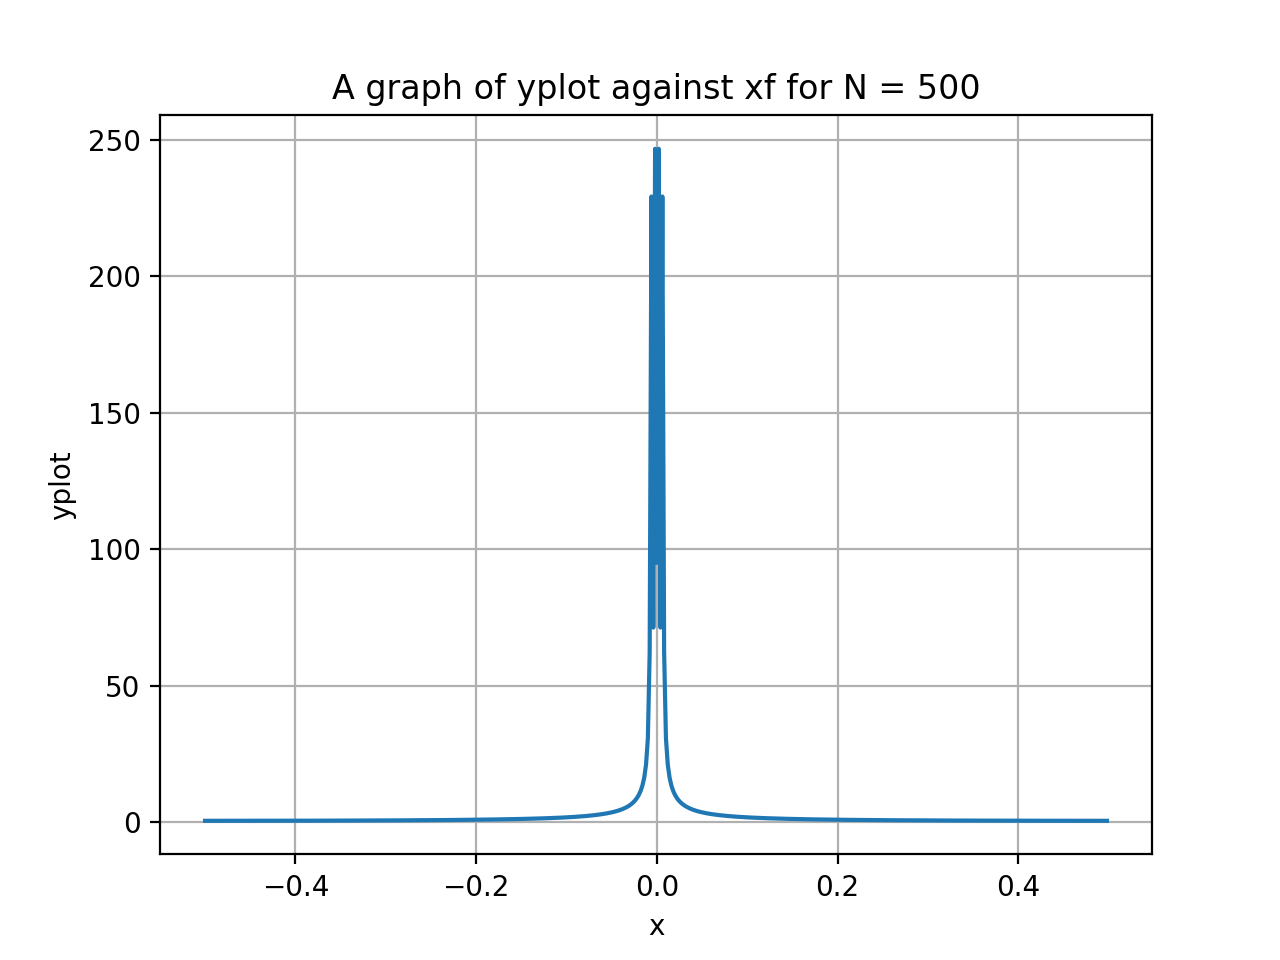

In [11]:
# for f(x) = cos(2*x) + sin(5*x)
figure(4)


What happens if you try to take the fft of a signal with high frequency, but only use a few points?

<IPython.core.display.Javascript object>


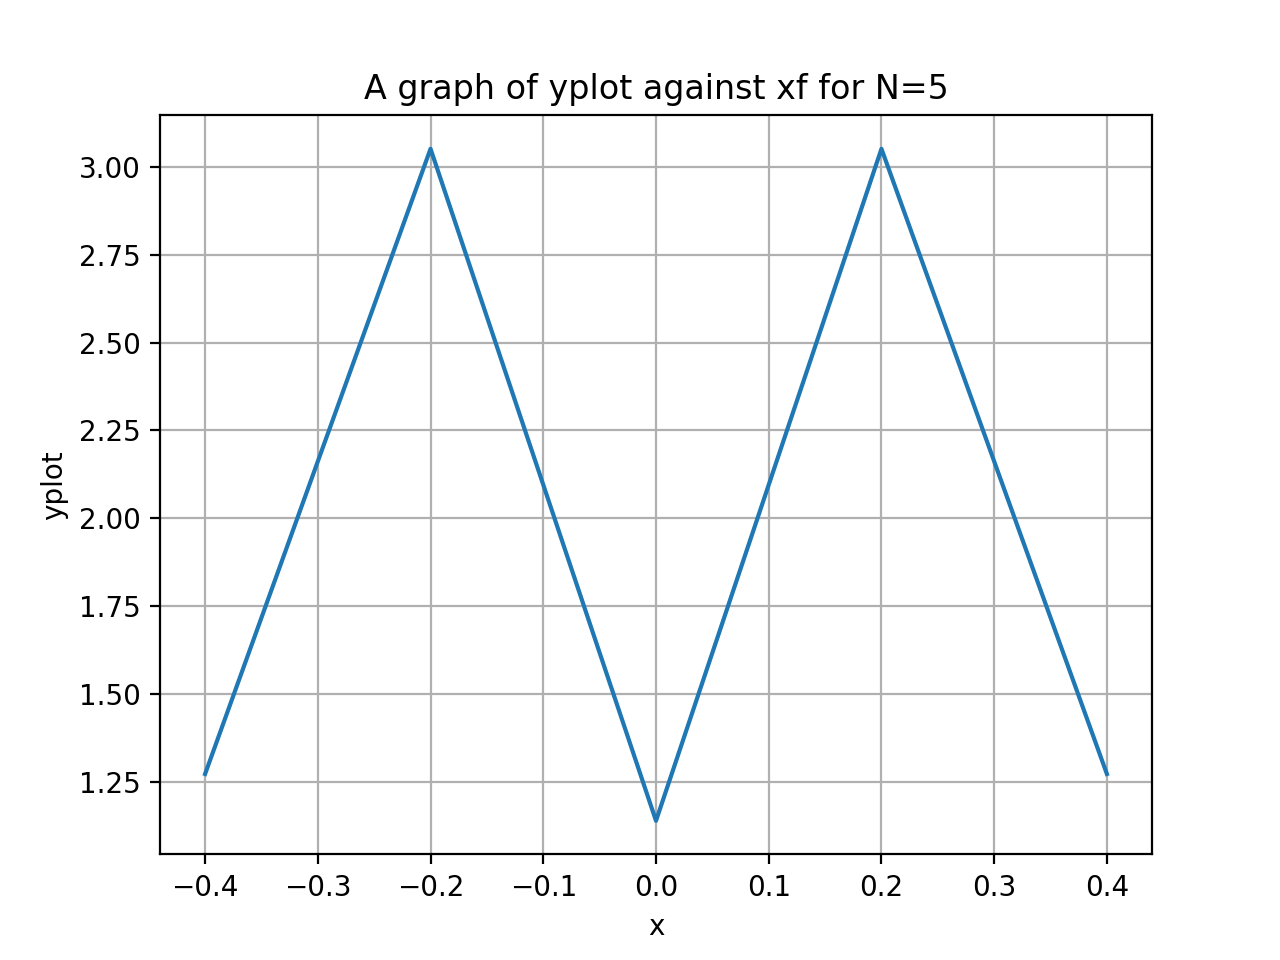

In [12]:
# for f(x) = cos(2*x) + sin(5*x)
figure(3)

The fft of f(x), y, evaluated at N points is an array of N points. 

__for N even__
- The elements y[1]...y[N/2-1] contain the positive frequency terms.
- The elements y[N/2]...y[N-1] contain the negative frequency terms in decesending order.

__for N odd__
- The elements y[1]...y[(N-1)/2] contain the positive frequency terms.
- The elements y[(N+1)/2]...y[N-1] contain the negative frequency terms in decesending order.


For the case when the squence x is real-valued, the valuse of y[n] for positive frequencies is the conjugate of the values y[n] for negative frequencies. This is because the spectrum is symmetric.